# Example Code for Analyzing Question Experiment Result
J. Nathan Matias (March 27, 2019)

Pre-analysis plan at: https://osf.io/fe3vj/

This provisional analysis diverges from the pre-analysis plan due to temporary convergence issues with negative binomial estimators. This notebook should not be interpreted as the final word on the results.

In particular, this code does not account for limitations in the randomization scheme used or  "non-compliance" on days when investigators did not complete the procedure.

Note: the 18th day was omitted from most experiments before randomization. I have inserted an empty row with NA values, along with information about what assignment the row would have received in the case of a balanced randomization scheme. I have also added the "compliance" column (1/0) to indicate whether the procedure was completed on that day.

Dates are not yet normalized between investigators. 

In [15]:
library(ggplot2)
library(MASS)
library(lme4)
library(gmodels)
library(estimatr)
options(repr.plot.width=7, repr.plot.height=3.5)
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS  10.14.3

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] estimatr_0.14  gmodels_2.18.1 lme4_1.1-19    Matrix_1.2-15  MASS_7.3-51.1 
[6] ggplot2_3.1.0 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.0       nloptr_1.2.1     pillar_1.3.1     compiler_3.5.1  
 [5] plyr_1.8.4       bindr_0.1.1      base64enc_0.1-3  tools_3.5.1     
 [9] digest_0.6.18    uuid_0.1-2       nlme_3.1-137     jsonlite_1.6    
[13] evaluate_0.12    tibble_2.0.0     gtable_0.2.0     lattice_0.20-38 
[17] texreg_1.36.23   pkgconfig_2.0.2  rlang_0.3.0.1    IRdisplay_0.7.

In [16]:
discussions <- read.csv("question-experiment-03.26.2019.all.students.csv", na.strings=c("NA","N/A", " "))
colnames(discussions)

[1] "compliance"                      "post.id"                        
 [3] "condition"                       "day"                            
 [5] "characters"                      "likes"                          
 [7] "comments"                        "shares"                         
 [9] "interactions"                    "popularity.prediction"          
[11] "platform"                        "friends.at.beginning.obfuscated"
[13] "experimenter"                    "topics"

## Summary Statistics
* **compliance**: 1 if the experimenter completed the procedure, 0 if the experimenter didn't
* **post.id**: in sequence, what post was this?
* **condition**: was this a treatment or control intervention? Treatment involved inviting comments from participants
* **day**: supposed to be the date, but varies
* **text**: for some experimenters, the text of the post
* **characters**: for some experimenters, how long the text was
* **likes**: number of likes received in 24 hours
* **comments**: number of comments received in 24 hours
* **shares**: number of shares received in 24 hours
* **interactions**: should be a sum of likes, comments, shares
* **popularity.prediction**: from 1 to 5, how popular did the poster think it would be
* **platform**: platform where the experiment occurred
* **friends.at.beginning**: number of friends the experimenter had at the beginning of the study, with +/- 10 fuzz added
* **experimenter**: experimenter code
* **topics**: topic annotation from experimenter

# Review per-experimenter distributions

In [17]:
print("Experiment Compliance (out of 1)")
print(aggregate(discussions$compliance,
    FUN=mean, by = list(discussions$experimenter)))

[1] "Experiment Compliance (out of 1)"
   Group.1         x
1       X1 0.8181818
2       X2 0.8636364
3       X3 0.9545455
4       X4 0.9545455
5       X5 0.9545455
6       Y1 0.9545455
7       Y2 0.9545455
8       Y3 0.8181818
9       Y4 0.8181818
10      Z1 0.9545455
11      Z2 0.9545455
12      Z3 1.0000000
13      Z4 0.9545455
14      Z5 0.9545455


[1] "Interactions (removing NA values)"
   Group.1          x
1       X1  1.1111111
2       X2  0.6842105
3       X3  6.0476190
4       X4 10.1428571
5       X5 30.9047619
6       Y1  1.4761905
7       Y2 13.0000000
8       Y3 27.4285714
9       Y4  1.4285714
10      Z1 14.0000000
11      Z2 14.6666667
12      Z3 12.5454545
13      Z4 37.3809524
14      Z5 27.7142857


Warning message:
“Removed 18 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 18 rows containing missing values (geom_point).”

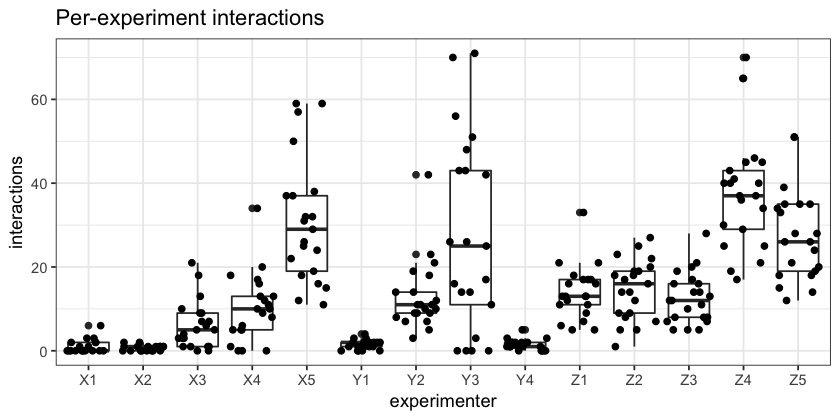

In [18]:
print("Interactions (removing NA values)")
print(aggregate(discussions$interactions,
    FUN=mean, by = list(discussions$experimenter), na.rm=TRUE))

ggplot(discussions, aes(experimenter, interactions)) +
    geom_boxplot() +
    geom_jitter(height=0) +
    theme_bw() +
    ggtitle("Per-experiment interactions")

[1] "Comments (removing NA values)"
   Group.1          x
1       X1 0.27777778
2       X2 0.05263158
3       X3 1.05000000
4       X4 0.94444444
5       X5 1.85714286
6       Y1 1.23809524
7       Y2 1.33333333
8       Y3 2.64705882
9       Y4 0.55555556
10      Z1 1.28571429
11      Z2 1.66666667
12      Z3 0.13636364
13      Z4 2.00000000
14      Z5 2.47619048


Warning message:
“Removed 29 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 29 rows containing missing values (geom_point).”

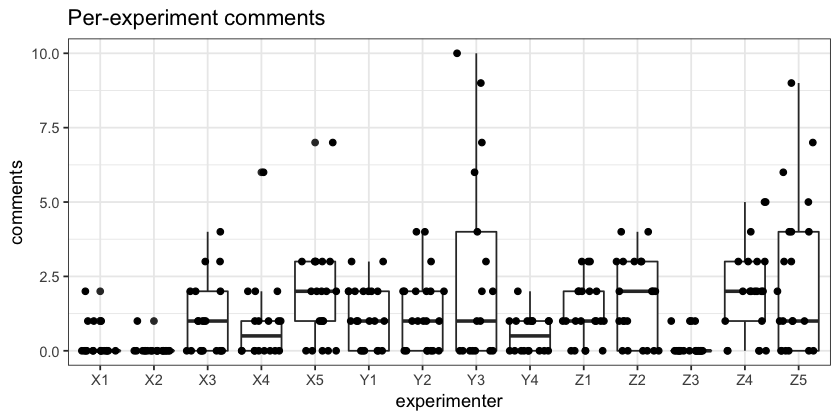

In [19]:
print("Comments (removing NA values)")
print(aggregate(discussions$comments,
    FUN=mean, by = list(discussions$experimenter), na.rm=TRUE))

ggplot(discussions, aes(experimenter, comments)) +
    geom_boxplot() +
    geom_jitter(height=0) +
    theme_bw() +
    ggtitle("Per-experiment comments")

In [20]:
summary(discussions$platform)

Facebook Instagram Stories           Twitter 
               22               220                44                22

In [21]:
summary(discussions$experimenter)

X1 X2 X3 X4 X5 Y1 Y2 Y3 Y4 Z1 Z2 Z3 Z4 Z5 
22 22 22 22 22 22 22 22 22 22 22 22 22 22

In [22]:
print("Overall condition balance")
summary(discussions$condition)
print("Overall condition balance among compliers")
summary(subset(discussions, compliance==1)$condition)

[1] "Overall condition balance"


control treatment 
      154       154

[1] "Overall condition balance among compliers"


control treatment 
      136       148

### Per Student Experiments

Warning message:
“Removed 29 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 29 rows containing missing values (geom_point).”

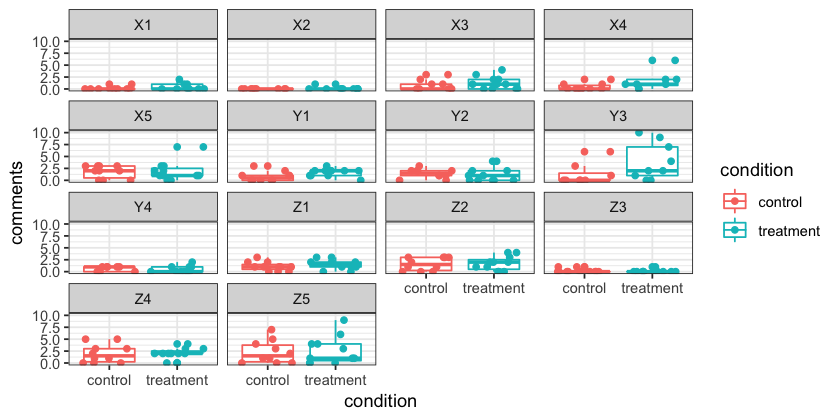

In [23]:
ggplot(discussions, aes(condition, comments, color=condition)) +
    geom_boxplot() +
    geom_jitter(height=0) +
    theme_bw() + 
    facet_wrap(. ~ experimenter )

Warning message:
“Removed 18 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 18 rows containing missing values (geom_point).”

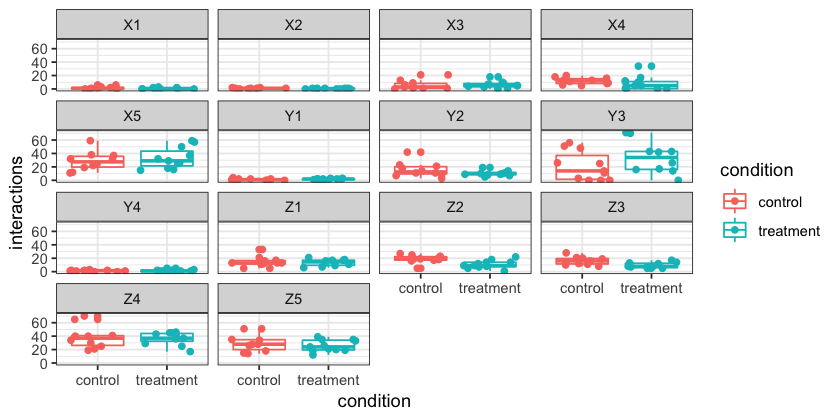

In [24]:
ggplot(discussions, aes(condition, interactions, color=condition)) +
    geom_boxplot() +
    geom_jitter(height=0) +
    theme_bw() + 
    facet_wrap(. ~ experimenter )

### Estimate per-experiment results

In [25]:
full.results.log1p <- data.frame(
    experimenter = NA,
    friends.at.beginning = NA,
    platform = NA,
    observations = NA,
    intercept.coef = NA,
    intercept.stderr = NA,
    treat.coef = NA,
    treat.stderr = NA,
    treat.coef.upr = NA,
    treat.coef.lwr = NA,
    treat.pvalue = NA
)

full.results.mean <- cbind(full.results.log1p)

for(ex in unique(discussions$experimenter)){
    ex.df <- subset(discussions, experimenter==ex)
    cat(paste(ex,""))
        
    estimator.log1p <- summary(lm1 <- lm(log1p(comments) ~ condition, 
                            data = ex.df))
    
    treat.coef.log1p <- estimator.log1p$coefficients['conditiontreatment',][['Estimate']]
    treat.stderr.log1p <- estimator.log1p$coefficients['conditiontreatment',][['Std. Error']]
    
    out.df <- data.frame(
        experimenter = ex.df$experimenter[1],
        friends.at.beginning = ex.df$friends.at.beginning[1],
        platform = ex.df$platform[1],
        observations = nrow(subset(ex.df, compliance ==1)),
        intercept.coef = estimator.log1p$coefficients['(Intercept)',][['Estimate']],
        intercept.stderr = estimator.log1p$coefficients['(Intercept)',][['Std. Error']],
        treat.coef = treat.coef.log1p,
        treat.coef.upr = treat.coef.log1p + 1.96 * treat.stderr.log1p,
        treat.coef.lwr = treat.coef.log1p - 1.96 * treat.stderr.log1p,
        treat.stderr = treat.stderr.log1p,
        treat.pvalue = estimator.log1p$coefficients['conditiontreatment',][['Pr(>|t|)']]    
    )
    full.results.log1p <- rbind(full.results.log1p, out.df)
    
    estimator.mean <- summary(lm2 <- lm(comments ~ condition, 
                              data = ex.df))
    
    treat.coef.mean <- estimator.mean$coefficients['conditiontreatment',][['Estimate']]
    treat.stderr.mean <- estimator.mean$coefficients['conditiontreatment',][['Std. Error']]
    
    out.df.mean <- data.frame(
        experimenter = ex.df$experimenter[1],
        friends.at.beginning = ex.df$friends.at.beginning[1],
        platform = ex.df$platform[1],
        observations = nrow(subset(ex.df, compliance ==1)),
        intercept.coef = estimator.mean$coefficients['(Intercept)',][['Estimate']],
        intercept.stderr = estimator.mean$coefficients['(Intercept)',][['Std. Error']],
        treat.coef = treat.coef.mean,
        treat.coef.upr = treat.coef.mean + 1.96 * treat.stderr.mean,
        treat.coef.lwr = treat.coef.mean - 1.96 * treat.stderr.mean,
        treat.stderr = treat.stderr.mean,
        treat.pvalue = estimator.mean$coefficients['conditiontreatment',][['Pr(>|t|)']]    
    )
    full.results.mean <- rbind(full.results.mean, out.df.mean)
    
}
full.results.log1p <- subset(full.results.log1p, is.na(experimenter)!=TRUE)
full.results.mean <- subset(full.results.mean, is.na(experimenter)!=TRUE)

Z1 Y1 X1 X2 Y2 Z2 Z3 X3 Y3 Z4 Y4 X4 Z5 X5 

### Plot per-experiment results

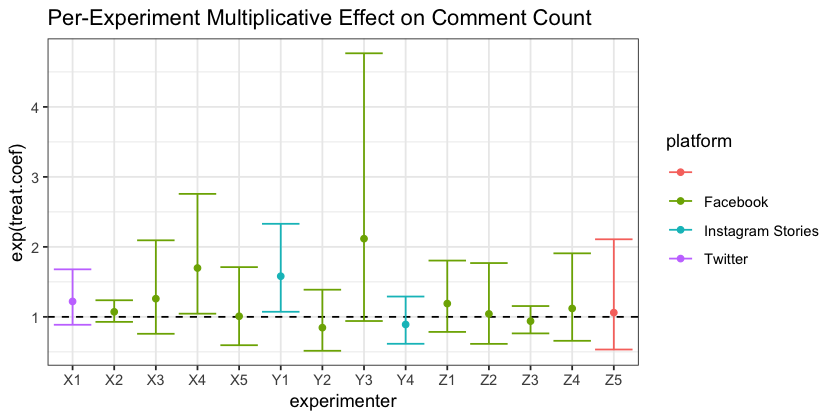

In [26]:
ggplot(full.results.log1p, aes(experimenter, exp(treat.coef), color=platform)) +
    geom_hline(yintercept=1,  linetype="dashed") +
    geom_point() +
    geom_errorbar(aes(ymin = exp(treat.coef.lwr), ymax = exp(treat.coef.upr))) +
    theme_bw() +
    ggtitle("Per-Experiment Multiplicative Effect on Comment Count")

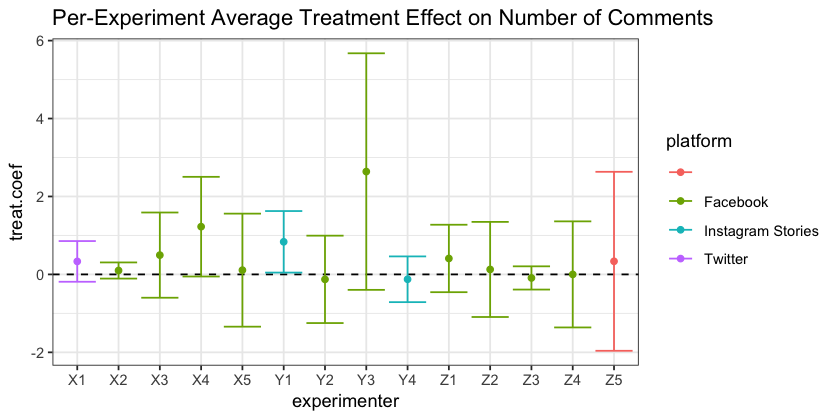

In [27]:
ggplot(full.results.mean, aes(experimenter, treat.coef, color=platform)) +
    geom_hline(yintercept=0,  linetype="dashed") +
    geom_point() +
    geom_errorbar(aes(ymin = treat.coef.lwr, ymax = treat.coef.upr)) +
    theme_bw() +
    ggtitle("Per-Experiment Average Treatment Effect on Number of Comments")